## 1-3 데이터의 변환


### 1. 데이터 변환

#### 정의

- 데이터를 분석하기 좋은 형태로 바꾸는 작업
- 수학적 의미에선 기존 변수공간보다 보다 해결하기 쉬는 공간으로 바꾸는 작업

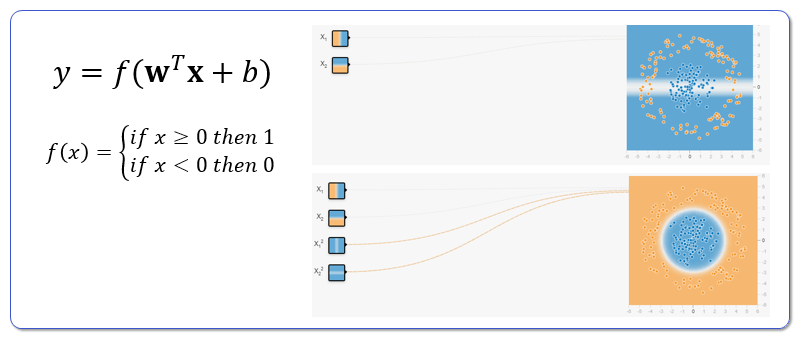

#### 데이터 변환의 종류

| 종류 | 설명 | 목적 |
| --- | --- | --- |
| 정규화<br/>Normalization | 데이터의 스케일 조정을 통한 변수간 균형을 맞추는 변환 | 변수의 영향력 균등화<br/>안정적 최적화<br/>결과 해석의 용이 |
| 인코딩<br/>Encoding | 범주형 데이터를 수치형으로 변환 | 모델에 적용 |
| 분포 변환<br/>Distribution Transformation | 데이터의 분포를 분석 방법에 가정에 맞춤<br/>데이터의 치우침을 해소 | 정규성(Normality)<br/>이상치 영향력 축소 |
| 구간화<br/>Binning / Discretization | 연속형 변수를 구간으로 나누어 범주화 | 이상치 영향력 감소<br/>해석력 강화<br/>비선형 패턴 모델링 |
| 요약 변수와 파생 변수<br/>Aggregated Variable<br/>Derived Variable | 분석의 목표에 맞춰 변수 생성 | 해석력 강화<br/>성능 향상 |


### 2. 정규화(Normalization)
공통된 척도로 변환하여 변수의 분포를 균일화

#### 주요 목적
- 여러 변수 공간의 특성을 균일화 하여 성능 향상
- 반복적 과정의 모델 학습이나 계수 추정의 수렴 속도 향상
- 변수의 상대적 중요도 파악을 위한 분포의 왜곡을 완화

### 2. 정규화(Normalization)

#### 주요 방법
| 방법 | 처리내용 | 특징 |
| --- | --- | --- |
| 최소-최대 정규화<br/>Min-Max Normalization |$𝑋_{𝑚𝑖𝑛−𝑚𝑎𝑥}=\frac{𝑋-𝑚𝑖𝑛(𝑋)}{max⁡(𝑋)−min⁡(𝑋)}$| 특정 스케일로 정규화<br/>이상치에 매우 민감 |
| 표준 정규화<br/>Z-score Normalization |$𝑋_{𝑧−𝑠𝑐𝑜𝑟𝑒}=\frac{𝑋−𝑚𝑒𝑎𝑛(𝑋)}{𝑠𝑡𝑑⁡(𝑋)}$| 평균이 0 / 표준 편차가 1 이 됨<br/>이상치에 비교적 강건 |
| 단위 벡터 정규화<br/>Unit Vector Normalization |$𝑥_{𝑛𝑜𝑟𝑚}=\frac{𝑥}{||𝑥||}$| 벡터 균등화<br/>방향성 기반의 유사도 활용<br/>이상치에 강건<br/>스케일 정보의 손실 |

#### 유의점
- 기존 단위의 상실 - 실제값을 기준으로 설명이 어려워짐

예제: California House Dataset 분석
- 원본 데이터
- 표준 정규화 데이터

### 3. 인코딩

#### 비정형 또는 비수치형 데이터를 수치형 데이터로 변환하는 과정

- 수치형 데이터를 필요로 하는 방법에 적용하기 위해 사용
- 특히 범주형 변수에 인코딩은 필수적 과정
- 분석 방법의 특징과 데이터의 성격 인코딩 방법의 선택 중요

#### 주요 방법
| 방법 | 처리내용 | 특징 |
| --- | --- | --- |
| 레이블 인코딩<br/>Label Encoding | 범주에 순차적인 정수 레이블 할당 | 수치/비교 연산에 사용되지 않게 유의 |
| 원-핫 인코딩<br/>One-Hot Encoding | 범주에 해당 여부를 나타내는 변수를 생성 | 범주 간 관계 왜곡 없음<br/>고차원화 위험 |
| 순서형 인코딩<br/>Ordinal Encoding | 범주의 순서에 따른 정수로 변환 | 순서의 보존<br/>수치 간 간격은 동일하지 않음 |
| 빈도 인코딩<br/>Frequency/Count Encoding | 범주가 등장하는 빈도로 변환 | 빈도에 유의미성이 있다면 효과적 |
| 타깃 인코딩<br/>Target Encoding | 대상 변수의 통계치로 변환 | 범주수가 많을 경우 효율적<br/>데이터 누수와 과적합에 유의 |


#### 빈도 인코딩

- 범주형 변수의 범주가 빈도 또는 비율로 변환

#### 타겟 인코딩(Target Encoding)

- 범주형 변수의 범주에 대응되는 타겟의 통계치로 치환
- 회귀일 경우: 평균, 중앙값...
- 분류일 경우: 클래스 비율

- 평활화(Smoothing): 신뢰도가 낮은 범주는 전체 평균과 가중합하여 보정

> 빈도가 몇몇의 케이스가 인코딩 영향에 큰영향을 줌 → 통계치의 신뢰도가 낮음

$𝐸𝑛𝑐𝑜𝑑𝑖𝑛𝑔(𝑐𝑎𝑡𝑒𝑔𝑜𝑟𝑦)=\frac{𝑛\bar{𝑦}_{𝑐𝑎𝑡}+𝑚\bar{𝑦}}{𝑛+𝑚}$


### 4. 분포 변환
통계적으로 더 바람직한 형태로 바꾸는 작업
#### 주요 목적
- 정규성 가정 충족
- 학습 안정성 향상
- 이상치 영향 완화
- 시각화 및 해석 개선

#### 주요 방법 
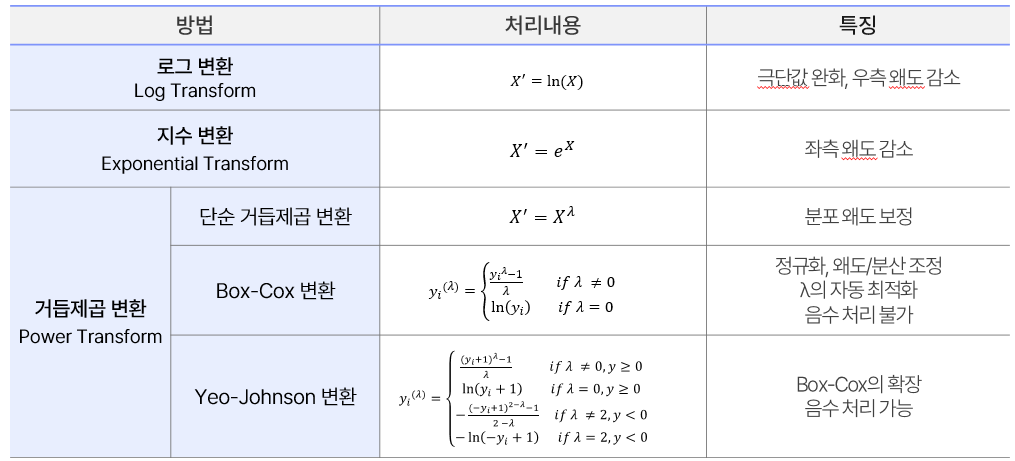



#### 로그 변환
$𝑋^′=ln⁡(𝑋)$
- 효과: 우측 왜도의 완화

#### 지수 변환
$𝑋^′=𝑒^𝑋$
- 효과: 좌측 왜도의 완화


#### 단순 거듭 제곱 변환

$𝑋^′=𝑋^𝜆$

- 효과

| 종류 | 효과 | 분포의 변화 |
| --- | --- | --- |
|$𝜆>1$| 1 보다 큰 값은 더욱 커지고<br/>1 보다 작은 값은 더욱 작아짐<br/>이상치 영향 증가 | 우측 왜도 증가<br/>좌측 왜도 감소 |
|$0<𝜆<1$ 1 보다 작은 값은 더욱 커지고<br/>1 보다 큰 값은 더욱 작아짐 | 우측 왜도 감소<br/>좌측 왜도 증가 |


#### 효과의 시각화

#### Box-cox 변환

- 정규 분포에 가깝게 하는 𝜆값을 도출
- 정규 분포를 가정하는 방법의 안정성 및 신뢰도 향상


$y_i^{(\lambda)} =
\begin{cases}
\dfrac{y_i^{\lambda} - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
\ln(y_i), & \text{if } \lambda = 0
\end{cases}$


# 5

### 구간화
- 연속형 변수에서 범주형 변수로 변환
- Binning, Discretization
#### 주요 목적
- 해석 용이성 부여
- 이상치 영향 감소
- 비선형 관계 처리
- 연산 효율화

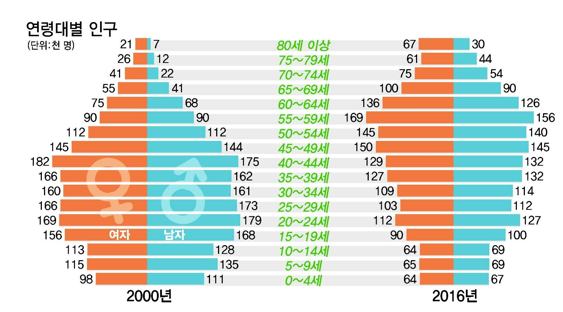

#### 주요 방법
| 종류 | 내용 |
| --- | --- |
| 고정 너비 구간화<br/>Equal-width binning | 일정한 너비로 분할 |
| 기반 구간화<br/>Quantile binning | 일정한 분위로 분할 |
| 메인 기반 구간화 | 도메인 지식을 기반한 기준으로 분할<br/>0\~18 세(청소년), 19\~64(성인), 65 세 이상(노인) |
| 클러스터 기반 구간화 | 군집화를 통한 구간화 |


### 6. 요약 변수와 파생 변수

- 분석의 목표에 맞춰 데이터 내에서 변수 생성

|   | 요약 변수<br/>Aggregated Variable | 파생 변수<br/>Derived Variable |
| --- | --- | --- |
| 정의 | 그룹 단위로 기존 데이터를 집계하여 생성한 변수 | 하나의 레코드 내에서 변수의 결합으로 만들어 짐 |
| 목적 | 패턴의 요약<br/>그룹 기반 비교<br/>보정 | 해석력 향상<br/>모델 성능 개선<br/>변수 간 관계 강화 |
| 유의사항 | 이상치나 결측치에 유의 | 특정 상황에서 보다는 보편적인 상황에서 유의미한 대표성을 지녀야 함<br/>논리적 타당성이 필요 |
| 예 | Sum, Mean, Count, Median, Max, Min, Ratio,<br/>Std/Var, Range …<br/>누적값 | 나이, 요일, …<br/>도메인 지식 기반(BMI, DTI, Churn rate…)<br/>교호항의 결합 |